In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in file
data = pd.read_csv("AmFam Facebook Auto Landing Page Test Data.csv")

#format column headers
data.columns = data.columns.str.replace(' ', '_')
data.columns = [x.lower() for x in data.columns]

In [3]:
#check head of dataframe
data.head()

,day,campaign_name,ad_set_name,ad_name,amount_spent_(usd),impressions,link_clicks,results
0,5/7/2022,YR~22_FS~MKTGCORPMEDIA_CN~AFHM_OB~CONV_RE~TIER...,CH~SOCIAL_PB~FBIG_CN~AFHM_OB~CONV_TG~PROLAL_SA...,CN~AFHM_CT~STATIC_CV~MoreThanAHouse_CM~EVERGRE...,761.49,27159,34.0,NaN
1,5/7/2022,YR~22_FS~MKTGCORPMEDIA_CN~AFBN_OB~CONV_RE~TIER...,CH~SOCIAL_PB~FBIG_CN~AFBN_OB~CONV_TG~PROLAL_SA...,CN~AFBN_CT~VID_CV~BundleVidmod_CM~EVERGREEN_TA...,2652.51,142775,207.0,19.0
2,5/7/2022,YR~22_FS~MKTGCORPMEDIA_CN~AFCM_OB~CONV_RE~TIER...,CH~SOCIAL_PB~FBIG_CN~AFCM_OB~CONV_TG~PROLAL_SA...,CN~AFCM_CT~STATIC_CV~WorkHardBusiness_CM~EVERG...,125.41,3846,2.0,NaN
3,5/7/2022,YR~22_FS~MKTGCORPMEDIA_CN~AFHM_OB~CONS_RE~TIER...,CH~SOCIAL_PB~FBIG_CN~AFHM_OB~CONS_TG~PROBHV_SA...,CN~AFHM_CT~STATIC_CV~SBMiniMakeover_CM~EVERGRE...,0.00,0,NaN,NaN
4,5/7/2022,YR~22_FS~MKTGCORPMEDIA_CN~AFHM_OB~CONV_RE~TIER...,CH~SOCIAL_PB~FBIG_CN~AFHM_OB~CONV_TG~PROCQT_SA...,CN~AFHM_CT~VID_CV~RappLifestyle_CM~EVERGREEN_T...,202.71,4615,6.0,NaN


In [4]:
#check default datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
day                   923 non-null object
campaign_name         923 non-null object
ad_set_name           923 non-null object
ad_name               923 non-null object
amount_spent_(usd)    923 non-null float64
impressions           923 non-null int64
link_clicks           793 non-null float64
results               505 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 57.8+ KB


In [5]:
#convert datatypes
data['campaign_name'] = data['campaign_name'].astype('category')
data['ad_set_name'] = data['ad_set_name'].astype('category')
data['ad_name'] = data['ad_name'].astype('category')
data['day'] = pd.to_datetime(data['day'])

In [6]:
#split the data for just the test and control rows
control = data[data['campaign_name'].str.contains('LinkControlFBIG')]
test = data[data['campaign_name'].str.contains('LinkTestFBIG')]

#assign group classification to each group
control['group'] = 'control'
test['group'] = 'test'

In [7]:
#merge the two dataframes
experiment = pd.concat([control, test], axis=0)

In [8]:
#create calculated fields
experiment['ctr'] = experiment['link_clicks'] / experiment['impressions']
experiment['cvr'] = experiment['results'] / experiment['link_clicks']
experiment['non_results'] = experiment['link_clicks'] - experiment['results'] 

#convert link_clicks and results to int
experiment['link_clicks'] = experiment['link_clicks'].astype('int')
experiment['results'] = experiment['results'].astype('int')
experiment['non_results'] = experiment['non_results'].astype('int')

In [9]:
#get summary stats of data
experiment.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount_spent_(usd),28.0,1594.754286,113.428040,1310.640000,1568.847500,1610.270000,1649.717500,1761.590000
impressions,28.0,46528.464286,7273.581330,35812.000000,39908.500000,46674.000000,50390.250000,63394.000000
link_clicks,28.0,55.928571,8.906629,38.000000,50.000000,55.500000,60.500000,73.000000
results,28.0,19.285714,5.442338,7.000000,15.000000,19.000000,23.000000,30.000000
ctr,28.0,0.001216,0.000196,0.000826,0.001102,0.001191,0.001319,0.001774
cvr,28.0,0.345003,0.085948,0.170732,0.286998,0.340864,0.413670,0.527273
non_results,28.0,36.642857,7.794653,25.000000,32.750000,35.500000,41.000000,53.000000


In [10]:
#set plot figure size
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style('white')

#set color palette to be AmFam colors
my_colors = ['#DD0031', '#0851A6', '#003A6D']
sns.set_palette( my_colors)

AttributeError: module 'numpy' has no attribute 'histogram_bin_edges'

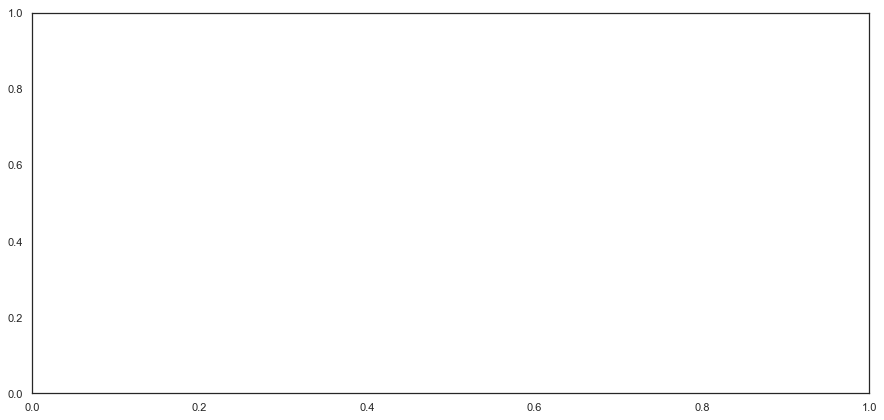

In [12]:
#plot histogram of link clicks to see distribution of values
sns.histplot(experiment, x='link_clicks', kde=True)

AttributeError: module 'numpy' has no attribute 'histogram_bin_edges'

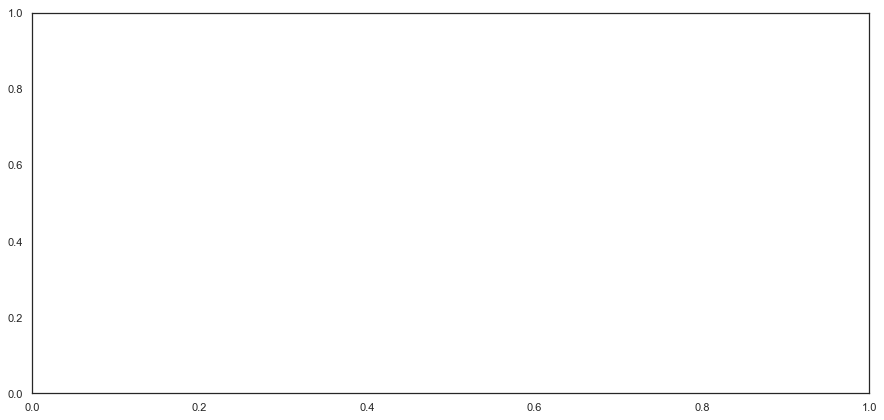

In [13]:
#plot histogram of conversions to see distribution of values
sns.histplot(experiment, x='results', kde=True)

<AxesSubplot:xlabel='non_results', ylabel='Count'>

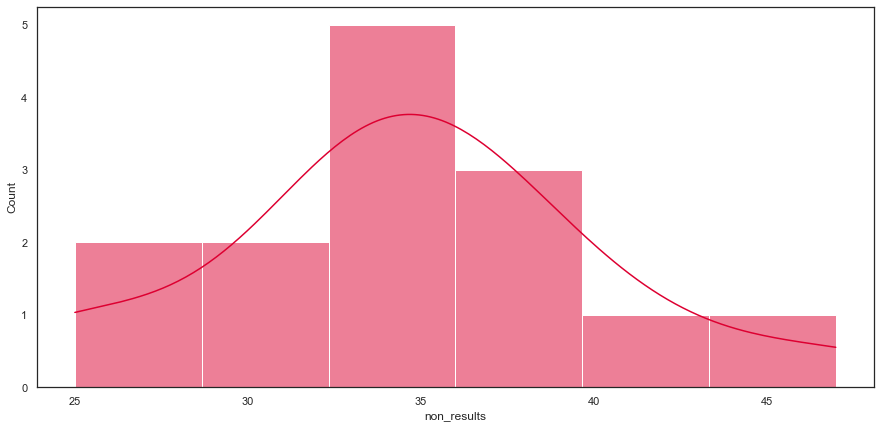

In [223]:
#plot histogram of conversions to see distribution of values
sns.histplot(experiment, x='non_results', kde=True)

<AxesSubplot:xlabel='ctr', ylabel='Count'>

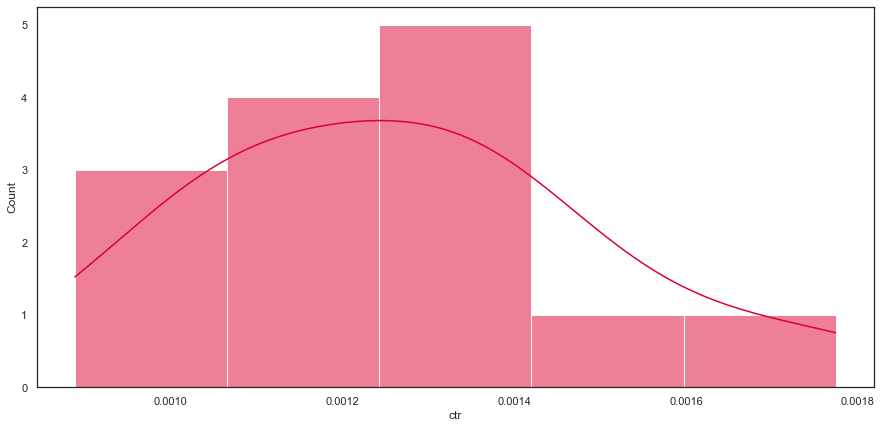

In [224]:
#plot histogram of ctr to see distribution of values
sns.histplot(experiment, x='ctr', kde=True)

<AxesSubplot:xlabel='cvr', ylabel='Count'>

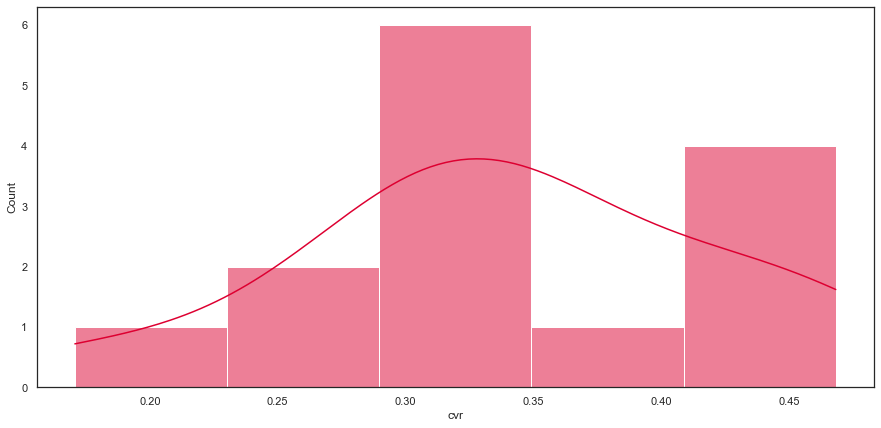

In [225]:
#plot histogram of cvr to see distribution of values
sns.histplot(experiment, x='cvr', kde=True)

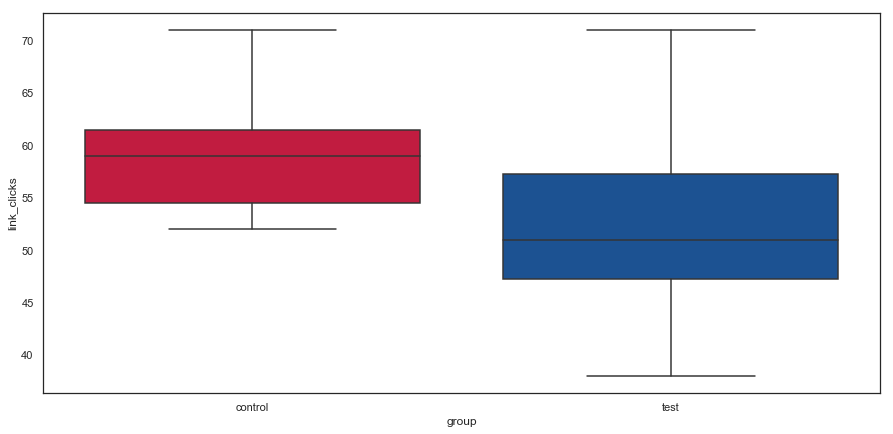

In [14]:
#create boxplots to compare values of test and control for link_clicks
sns.boxplot(x='group', y='link_clicks', data=experiment, sym='')

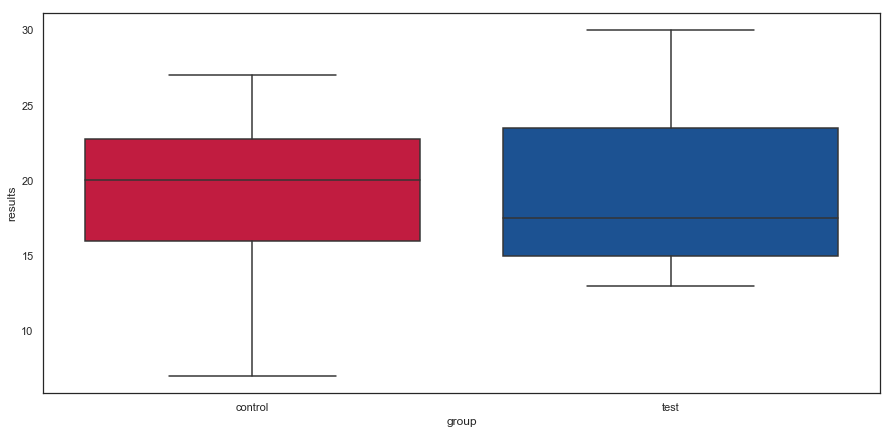

In [15]:
#create boxplots to compare values of test and control for conversions
sns.boxplot(x='group', y='results', data=experiment, sym='')

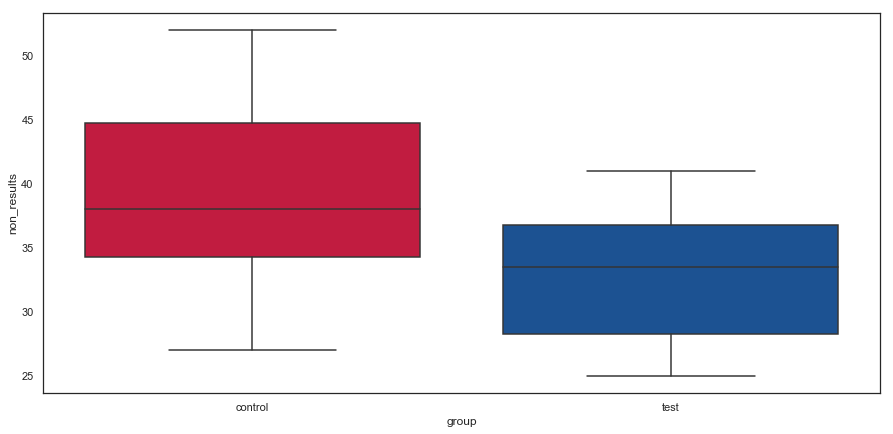

In [16]:
#create boxplots to compare values of test and control for non_conversions
sns.boxplot(x='group', y='non_results', data=experiment, sym='')

[Text(0.5,1,'Comparison of CTR between Control and Test')]

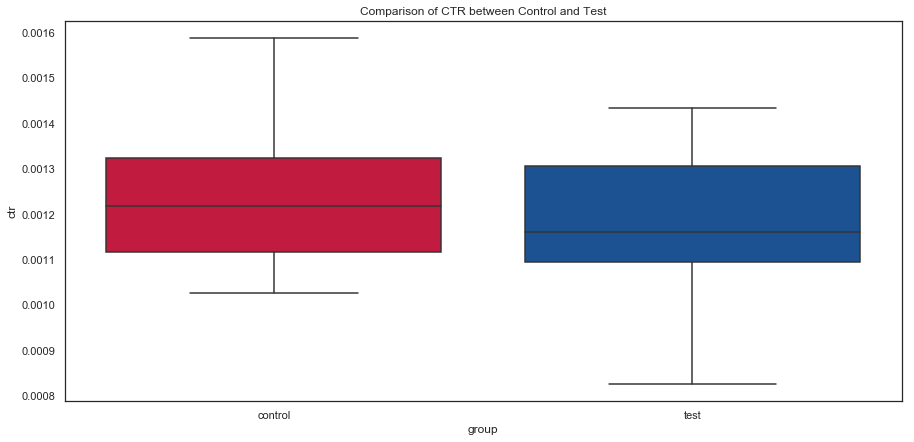

In [37]:
#create boxplots to compare values of test and control for ctr
sns.boxplot(x='group', y='ctr', data=experiment, sym='').set(title='Comparison of CTR between Control and Test')

[Text(0.5,1,'Comparison of CVR between Control and Test')]

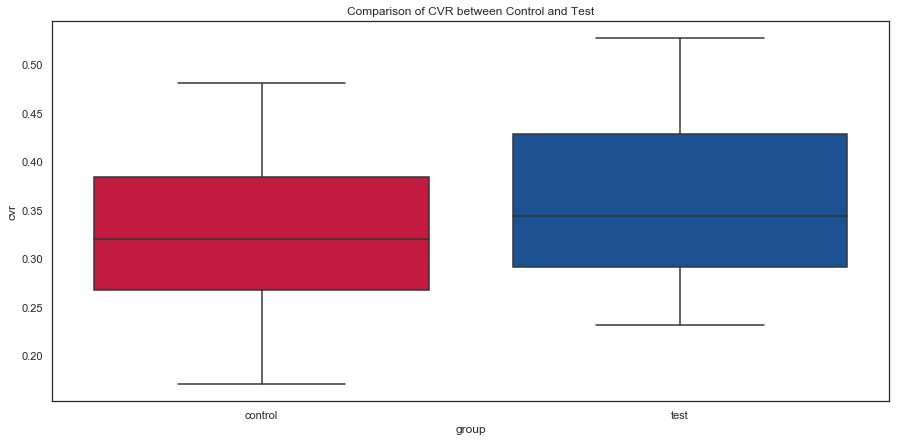

In [39]:
#create boxplots to compare values of test and control for cvr
sns.boxplot(x='group', y='cvr', data=experiment, sym='').set(title='Comparison of CVR between Control and Test')

In [19]:
#test for homogeneity of variance for cvr and store p-value of levene test into a variable
levene_p_value = stats.levene(experiment['cvr'][experiment['group'] == 'control'],
            experiment['cvr'][experiment['group'] == 'test'])[1]

In [20]:
if levene_p_value > 0.05:
    print(f"We fail to reject the null hypothesis that variance is equal between the two groups because p-value is {levene_p_value}")
else:
    print(f"We reject the null hypothesis because p-value is {levene_p_value}, the variance between the two groups are not equal")

We fail to reject the null hypothesis that variance is equal between the two groups because p-value is 0.8479952473399508


In [21]:
#create summary aggregate of results and non_results
observation_summary = experiment.groupby(['group'])['results', 'non_results'].sum().reset_index()

In [22]:
observation_summary

,group,results,non_results
0,control,269,548
1,test,271,478


In [23]:
#create 2x2 numpy array of observation_summary
observations = np.array([[observation_summary.iloc[0]['non_results'], observation_summary.iloc[0]['results']],
         [observation_summary.iloc[1]['non_results'], observation_summary.iloc[1]['results']]])

In [24]:
#define hypotheses in preparation for chi-square test
null_hypothesis = "There is no relationship between landing page and CVR. They are independent"
alternate_hypothesis = "There is a relationship between landing page and CVR. They are independent"
acceptance_criteria = 0.05

In [25]:
#run chi-square test
chi2_statistic, p_value, dof, expected_values = chi2_contingency(observations, correction = False)
print(chi2_statistic, p_value)

1.8339479889740262 0.17566193960335913


In [26]:
# find the critical value for our test
critical_value = chi2.ppf(1 - acceptance_criteria, dof)
print(critical_value)

3.841458820694124


In [27]:
#chi-square statistic summary
if chi2_statistic >= critical_value:
    print(f"As our chi-square statistic of {chi2_statistic} is higher than our critical value of {critical_value} - we reject the null hypothesis, and conclude that: {alternate_hypothesis}.")
else:
    print(f"As our chi-square statistic of {chi2_statistic} is lower than our critical value of {critical_value} - we retain the null hypothesis, and conclude that: {null_hypothesis}.")

As our chi-square statistic of 1.8339479889740262 is lower than our critical value of 3.841458820694124 - we retain the null hypothesis, and conclude that: There is no relationship between landing page and CVR. They are independent.


In [28]:
#p-value summary
if p_value <= acceptance_criteria:
    print(f"As our p_value of {p_value} is lower than our acceptance_criteria of {acceptance_criteria} - we reject the null hypothesis, and conclude that: {alternate_hypothesis}.")
else:
    print(f"As our p_value of {p_value} is higher than our acceptance_criteria of {acceptance_criteria} - we retain the null hypothesis, and conclude that: {null_hypothesis}.")

As our p_value of 0.17566193960335913 is higher than our acceptance_criteria of 0.05 - we retain the null hypothesis, and conclude that: There is no relationship between landing page and CVR. They are independent.


In [29]:
#store results in a dataframe
d = {'week_start': ['05-01-2022'], 'week_end': ['05-14-2022'], 'p_value': [p_value]}
df = pd.DataFrame(data=d)

In [30]:
df

,week_start,week_end,p_value
0,05-01-2022,05-14-2022,0.175662


In [31]:
#run a independent t-test in addition to chi-square test to further validate
t_value, p_value = stats.ttest_ind(experiment['cvr'][experiment['group'] == 'control'], 
                                   experiment['cvr'][experiment['group'] == 'test'])

In [32]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is -0.989143
p-value for two tailed test is 0.331710
